In [17]:
import torch
from torch import nn
import random
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, dataset

In [18]:

#pytorch linear model

class LinearRegression_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layers=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layers(x)

      

In [19]:
torch.manual_seed(42)
model_0=LinearRegression_1()
model_0,model_0.parameters()



(LinearRegression_1(
   (linear_layers): Linear(in_features=1, out_features=1, bias=True)
 ), <generator object Module.parameters at 0x7fbc0ea25f50>)

In [20]:
optim=torch.optim.SGD(params=model_0.parameters(),lr=0.001)
loss_fn = nn.L1Loss()

In [21]:
model_0.state_dict() 

OrderedDict([('linear_layers.weight', tensor([[0.7645]])),
             ('linear_layers.bias', tensor([0.8300]))])

In [22]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [24]:
train_loss_list=[]
test_loss_list=[]
epoch_list=[]
epochs=400
for epoch in range(epochs):
  model_0.train()
  y_preds=model_0(X_train)
  train_loss=loss_fn(y_preds,y_train)

  optim.zero_grad()
  train_loss.backward()
  optim.step()

  model_0.eval()
  with torch.inference_mode():
    y_preds_1=model_0(X_test)
    test_loss=loss_fn(y_preds_1,y_test)

  if epoch %10==0:
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    epoch_list.append(epoch)
    print(f"Epochs : {epoch}   Train_loss: {train_loss}    Test_loss:   {test_loss}") 



Epochs : 0   Train_loss: 0.5551779866218567    Test_loss:   0.5861000418663025
Epochs : 10   Train_loss: 0.543657124042511    Test_loss:   0.5726292729377747
Epochs : 20   Train_loss: 0.5321362614631653    Test_loss:   0.559158444404602
Epochs : 30   Train_loss: 0.5206153988838196    Test_loss:   0.5456877946853638
Epochs : 40   Train_loss: 0.5090945363044739    Test_loss:   0.5322169065475464
Epochs : 50   Train_loss: 0.4975736737251282    Test_loss:   0.518746018409729
Epochs : 60   Train_loss: 0.48605290055274963    Test_loss:   0.505275309085846
Epochs : 70   Train_loss: 0.47453203797340393    Test_loss:   0.49180442094802856
Epochs : 80   Train_loss: 0.4630111753940582    Test_loss:   0.47833362221717834
Epochs : 90   Train_loss: 0.4514903128147125    Test_loss:   0.4648628234863281
Epochs : 100   Train_loss: 0.4399694502353668    Test_loss:   0.4513920247554779
Epochs : 110   Train_loss: 0.4284486174583435    Test_loss:   0.4379211962223053
Epochs : 120   Train_loss: 0.4169277548

In [25]:
 model_0.state_dict()

OrderedDict([('linear_layers.weight', tensor([[0.6085]])),
             ('linear_layers.bias', tensor([0.4300]))])

In [26]:
import torch
from torch import nn
import random
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, dataset
from sklearn.datasets import make_circles

In [27]:
n_samples=1000
X,y=make_circles(n_samples=n_samples,
                         noise=0.3,
                         random_state=42)


In [28]:
len(X)

1000

In [29]:
X[0]

array([0.59171471, 0.43674853])

In [30]:
import pandas as pd
circles=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'labels':y})
circles.head(2)

,X1,X2,labels
0,0.591715,0.436749,1
1,-0.457450,0.361601,1


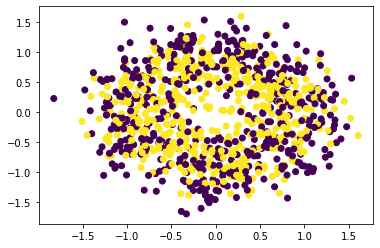

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y)

In [32]:
#convert data to tensors

type(X)

numpy.ndarray

In [33]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)



In [35]:
#building pytorch models

device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [36]:
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [37]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)


  def forward(self,x : torch.tensor) -> torch.tensor:
    return self.layer_2(self.layer_1(x))

model_v0=CircleModel().to(device)

model_v0.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.5224,  0.0958,  0.3410, -0.0998,  0.5451], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0661, -0.2088,  0.1140, -0.2060, -0.0524]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.1816], device='cuda:0'))])

In [38]:
with torch.inference_mode():
  untrained_preds=model_v0(X_test.to(device))


In [39]:
# torch.round(untrained_preds)

In [40]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_v0.parameters(), lr=0.1)

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
Epochs_list=[]
train_loss_list=[]
test_loss_list=[]

epochs=400

for epoch in range(epochs):
  model_v0.train()
  y_preds_train=model_v0(X_train).squeeze()
  y_preds_2=torch.round(torch.sigmoid(y_preds_train))
  train_loss=loss_fn(y_preds_train,y_train)
  
  train_accuracy=accuracy_fn(y_true=y_train,y_pred=y_preds_2)
  
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_v0.eval()
  with torch.inference_mode():
    test_logits=model_v0(X_test).squeeze()
    y_preds_test=torch.round(torch.sigmoid(test_logits))
    test_loss_=loss_fn(test_logits,y_test)

    test_accuracy=accuracy_fn(y_true=y_test,y_pred=y_preds_test)

  if epoch % 10 ==0:

    print(f"Epoch : {epoch}   Loss : {train_loss}  Accuracy: {train_accuracy}  test loss: {test_loss_}  test_accuracy: {test_accuracy}")


Epoch : 0   Loss : 0.6979888677597046  Accuracy: 47.875  test loss: 0.7002159953117371  test_accuracy: 47.5
Epoch : 10   Loss : 0.6960204839706421  Accuracy: 48.625  test loss: 0.6986801028251648  test_accuracy: 48.5
Epoch : 20   Loss : 0.6949367523193359  Accuracy: 49.0  test loss: 0.6977695822715759  test_accuracy: 47.5
Epoch : 30   Loss : 0.6942893862724304  Accuracy: 49.75  test loss: 0.6971531510353088  test_accuracy: 49.0
Epoch : 40   Loss : 0.6938779950141907  Accuracy: 49.75  test loss: 0.6966973543167114  test_accuracy: 49.0
Epoch : 50   Loss : 0.6936051249504089  Accuracy: 49.5  test loss: 0.6963430643081665  test_accuracy: 48.0
Epoch : 60   Loss : 0.693419337272644  Accuracy: 50.0  test loss: 0.6960604786872864  test_accuracy: 49.0
Epoch : 70   Loss : 0.6932905912399292  Accuracy: 50.24999999999999  test loss: 0.695831835269928  test_accuracy: 49.0
Epoch : 80   Loss : 0.6932005286216736  Accuracy: 50.625  test loss: 0.695645272731781  test_accuracy: 50.0
Epoch : 90   Loss : 

In [42]:
class CircleModel_v2(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack =nn.Sequential(
    nn.Linear(in_features=input_features,out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units,out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units,out_features=output_features),
    nn.ReLU()
    )



  def forward(self,x : torch.tensor) -> torch.tensor:
    return self.linear_layer_stack(x)


NUM_CLASSES = 1
NUM_FEATURES = 2
RANDOM_SEED = 42

model_v1=CircleModel_v2(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)

model_v1.state_dict()

OrderedDict([('linear_layer_stack.0.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
      

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
Epochs_list=[]
train_loss_list=[]
test_loss_list=[]

epochs=400

for epoch in range(epochs):
  model_v1.train()
  y_preds_train=model_v1(X_train).squeeze()
  y_preds_2=torch.round(torch.sigmoid(y_preds_train))
  train_loss=loss_fn(y_preds_train,y_train)
  
  train_accuracy=accuracy_fn(y_true=y_train,y_pred=y_preds_2)
  
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_v1.eval()
  with torch.inference_mode():
    test_logits=model_v0(X_test).squeeze()
    y_preds_test=torch.round(torch.sigmoid(test_logits))
    test_loss_=loss_fn(test_logits,y_test)

    test_accuracy=accuracy_fn(y_true=y_test,y_pred=y_preds_test)

  if epoch % 10 ==0:

    print(f"Epoch : {epoch}   Loss : {train_loss}  Accuracy: {train_accuracy}  test loss: {test_loss_}  test_accuracy: {test_accuracy}")


Epoch : 0   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 10   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 20   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 30   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 40   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 50   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 60   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 70   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 80   Loss : 0.6931471824645996  Accuracy: 50.0  test loss: 0.6945756077766418  test_accuracy: 50.0
Epoch : 90   Loss : 0.6931471824645996

In [59]:
  # train_loss=loss_fn(y_preds_train,y_train)
# y_preds_train

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


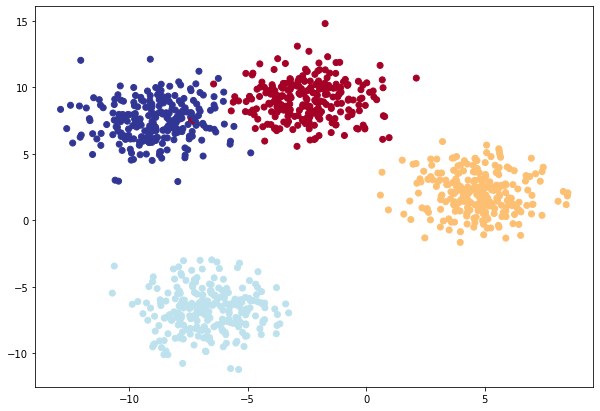

In [45]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [46]:
class blobModel_v2(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack =nn.Sequential(
    nn.Linear(in_features=input_features,out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units,out_features=hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=hidden_units,out_features=output_features),
    )



  def forward(self,x : torch.tensor) -> torch.tensor:
    return self.linear_layer_stack(x)


NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

blobModel=blobModel_v2(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)

blobModel.state_dict()

OrderedDict([('linear_layer_stack.0.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
      

In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(blobModel.parameters(), 
                            lr=0.1)

In [48]:
torch.manual_seed(42)

# Set number of epochs
epochs = 50

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    blobModel.train()

    # 1. Forward pass
    y_logits = blobModel(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    blobModel.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = blobModel(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.07554, Test Acc: 48.00%
Epoch: 10 | Loss: 0.64476, Acc: 96.75% | Test Loss: 0.66069, Test Acc: 97.50%
Epoch: 20 | Loss: 0.42535, Acc: 98.50% | Test Loss: 0.43074, Test Acc: 100.00%
Epoch: 30 | Loss: 0.25294, Acc: 99.12% | Test Loss: 0.24508, Test Acc: 99.50%
Epoch: 40 | Loss: 0.11232, Acc: 99.25% | Test Loss: 0.10229, Test Acc: 99.50%


In [49]:
y_preds_train=model_v1(X_train).squeeze()

In [58]:
# y_preds_train

In [51]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

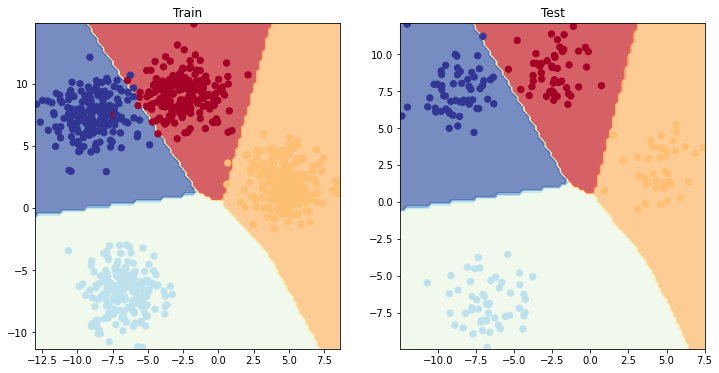

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(blobModel, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(blobModel, X_blob_test, y_blob_test)

In [54]:
import torch

# Setup device agnostic code


# Setup random seed
RANDOM_SEED = 42

In [55]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [169]:
#generate dataset and convert them to tensors
X,y=make_moons(n_samples=1000,shuffle=True,random_state=42)
X_moon=torch.from_numpy(X).type(torch.float)
y_moon=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X_moon,y_moon,random_state=42,test_size=0.2)
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

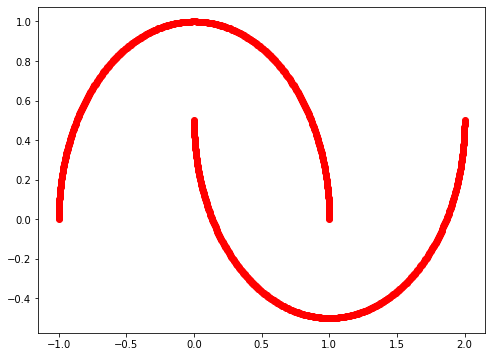

In [170]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],color='r', cmap=plt.cm.RdYlBu)

In [171]:
from torch import nn
class make_Moons_v1(nn.Module):
  def __init__(self,in_feature,out_features,hidden_units):
    super().__init__()
    self.sequential_linear_layer_stack=nn.Sequential(
      nn.Linear(in_features=in_feature,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=out_features),
      nn.ReLU()
    )

  def forward(self,x : torch.tensor)-> torch.tensor:
    return self.sequential_linear_layer_stack(x)

In [172]:

NUM_CLASSES = 1
NUM_FEATURES = 2
RANDOM_SEED = 42
hidden_units_=10
model_moon_=make_Moons_v1(in_feature=NUM_FEATURES,out_features=NUM_CLASSES,hidden_units=hidden_units_).to(device)

model_moon_.state_dict()

OrderedDict([('sequential_linear_layer_stack.0.weight',
              tensor([[-0.2071, -0.1347],
                      [-0.2982, -0.4777],
                      [-0.3744,  0.6990],
                      [-0.1183,  0.2477],
                      [ 0.4890, -0.0552],
                      [-0.3804, -0.4791],
                      [-0.2605,  0.2524],
                      [-0.5955, -0.0863],
                      [ 0.2690,  0.5769],
                      [ 0.2128,  0.1398]], device='cuda:0')),
             ('sequential_linear_layer_stack.0.bias',
              tensor([ 0.4841,  0.3267,  0.2392, -0.2192, -0.5670, -0.1527, -0.1282,  0.0519,
                      -0.0778,  0.2859], device='cuda:0')),
             ('sequential_linear_layer_stack.2.weight',
              tensor([[ 0.2101, -0.1282, -0.3001, -0.1622, -0.1513,  0.1793, -0.2040, -0.0297,
                       -0.0670, -0.1919],
                      [ 0.1433, -0.1317, -0.0164, -0.2223, -0.0319,  0.0449, -0.0129, -0.1182,
        

In [173]:
loss_func=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_moon_.parameters(),lr=0.1)

def accuracy_func(y_true,y_preds):
  correct=torch.eq(y_true,y_preds).sum().item()
  acc=(correct/len(y_pred))*100
  return acc#.to(device)


In [206]:
# !pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy().to(device) # send accuracy function to device
acc_fn

Accuracy()

In [175]:
epochs=2000
# epoch_list=[]
# train_loss_list=[]
# test_loss_list=[]

for epoch in range(epochs):
  model_moon_.train()
  y_logits=model_moon_(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))

  train_loss=loss_func(y_logits,y_train)
  acc = acc_fn(y_preds, y_train.int())
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_moon_.eval()
  with torch.inference_mode():
    test_logits=model_moon_(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_func(test_logits,y_test)
    test_acc = acc_fn(test_preds, y_test.int())
  if epoch %150==0:
    # epoch_list.append(epoch)
    # train_loss_list.append(train_accuracy)
    # test_loss_list.append(test_loss)
    print(f'Epochs: {epoch}   train_loss"{train_loss}   accuracy {acc}   test_loss: {test_loss}    test_accuracy: {test_acc}')




Epochs: 0   train_loss"0.6931262612342834   accuracy 0.5325000286102295   test_loss: 0.6930996775627136    test_accuracy: 0.4950000047683716
Epochs: 150   train_loss"0.5167187452316284   accuracy 0.8412500023841858   test_loss: 0.5252007842063904    test_accuracy: 0.8100000023841858
Epochs: 300   train_loss"0.45746275782585144   accuracy 0.8899999856948853   test_loss: 0.45779627561569214    test_accuracy: 0.8849999904632568
Epochs: 450   train_loss"0.436511754989624   accuracy 0.8987500071525574   test_loss: 0.4323290288448334    test_accuracy: 0.9100000262260437
Epochs: 600   train_loss"0.4224716126918793   accuracy 0.9112499952316284   test_loss: 0.41523468494415283    test_accuracy: 0.9150000214576721
Epochs: 750   train_loss"0.40954649448394775   accuracy 0.9237499833106995   test_loss: 0.4000515639781952    test_accuracy: 0.9350000023841858
Epochs: 900   train_loss"0.39160385727882385   accuracy 0.9487500190734863   test_loss: 0.3841717839241028    test_accuracy: 0.94499999284744

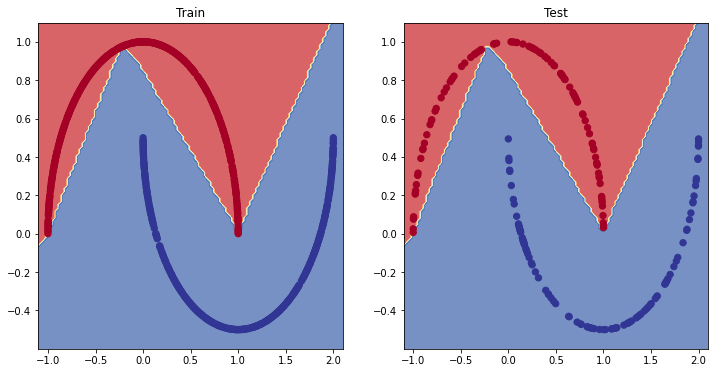

In [176]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_moon_, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_moon_, X_test, y_test)

In [177]:
#Summary
# the above result came after below iterations


# 1. 100 epochs LR=0.01
# 2. 500 epochs LR=0.01
# 3. 1000 epochs LR=0.01
# 4. 1500 epochs LR=0.01
# 5. 2000 epochs LR=0.01
# 6. 1000 epochs LR=0.05
# 7. 1000 epochs LR=0.1
# 8. 1500 epochs LR=0.1
# 9. 2000 epochs LR=0.1

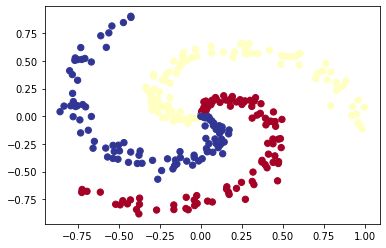

In [178]:
#create our own spiral dataset



import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [219]:
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)



TypeError: ignored

In [220]:
class Spiral_model_(nn.Module):
  def __init__(self,input_features,output_features,hidden_layers=8):
    super().__init__()
    self.layers_stacks=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_layers),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layers,out_features=hidden_layers),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layers,out_features=output_features),
        nn.ReLU()
    )

  def forward(self,x : torch.tensor) -> torch.tensor:
    return self.layers_stacks(x)
    

In [221]:
model_spiral_v1=Spiral_model_(input_features=2,output_features=3,hidden_layers=8).to(device)
# model_spiral_v1.state_dict()

In [222]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)


torch.float32 torch.float32 torch.int64 torch.int64


In [223]:
print("Logits:")
print(model_spiral_v1(X_train)[:10])


print("Pred probs:")
print(torch.softmax(model_spiral_v1(X_train)[:10],dim=1))

print("Pred labels:")
print(torch.softmax(model_spiral_v1(X_train)[:10], dim=1).argmax(dim=1))

Logits:
tensor([[0.2523, 0.1295, 0.0343],
        [0.2422, 0.1360, 0.0268],
        [0.2681, 0.1214, 0.0471],
        [0.2711, 0.1285, 0.0429],
        [0.2757, 0.1179, 0.0528],
        [0.2675, 0.1224, 0.0468],
        [0.2687, 0.1215, 0.0475],
        [0.2513, 0.1341, 0.0254],
        [0.2529, 0.1320, 0.0362],
        [0.2716, 0.1285, 0.0429]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3719, 0.3290, 0.2991],
        [0.3696, 0.3324, 0.2980],
        [0.3752, 0.3240, 0.3008],
        [0.3755, 0.3256, 0.2989],
        [0.3768, 0.3218, 0.3015],
        [0.3750, 0.3243, 0.3007],
        [0.3753, 0.3239, 0.3008],
        [0.3721, 0.3310, 0.2969],
        [0.3716, 0.3292, 0.2992],
        [0.3756, 0.3255, 0.2988]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [224]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_spiral_v1.parameters(),
                             lr=0.02)

In [225]:
epochs=200
for epoch in range(epochs):
  model_spiral_v1.train()
  y_logits=model_spiral_v1(X_train)
  y_preds_train=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_train)
  acc=acc_fn(y_preds_train,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_spiral_v1.eval()

  with torch.inference_mode():
    test_logits=model_spiral_v1(X_test)
    test_preds_=torch.softmax(test_logits,dim=1).argmax(dim=1)
    
    test_loss=loss_fn(test_logits,y_test)
    test_acc=acc_fn(test_preds_,y_test)

    if epoch%10==0:
      print(f"epoch: {epoch}   accuracy: {acc}  loss: {loss}   test_loss:{test_loss}    test_accuracy: {test_acc}")

epoch: 0   accuracy: 0.32499998807907104  loss: 1.1103628873825073   test_loss:1.1058690547943115    test_accuracy: 0.20000000298023224
epoch: 10   accuracy: 0.4000000059604645  loss: 1.0669572353363037   test_loss:1.065181016921997    test_accuracy: 0.4166666567325592
epoch: 20   accuracy: 0.5041666626930237  loss: 0.9459165930747986   test_loss:0.9440666437149048    test_accuracy: 0.5166666507720947
epoch: 30   accuracy: 0.6000000238418579  loss: 0.7573794722557068   test_loss:0.783807635307312    test_accuracy: 0.5666666626930237
epoch: 40   accuracy: 0.6000000238418579  loss: 0.6507879495620728   test_loss:0.7128229141235352    test_accuracy: 0.5166666507720947
epoch: 50   accuracy: 0.6625000238418579  loss: 0.583812415599823   test_loss:0.6379855275154114    test_accuracy: 0.5833333134651184
epoch: 60   accuracy: 0.7250000238418579  loss: 0.5150837302207947   test_loss:0.5590276122093201    test_accuracy: 0.6499999761581421
epoch: 70   accuracy: 0.7875000238418579  loss: 0.4443483

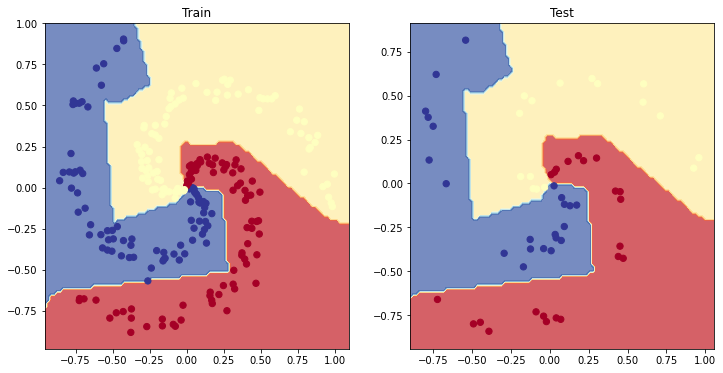

In [227]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_spiral_v1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_spiral_v1, X_test, y_test)

In [229]:
########

# Summary of this notebook


# 1: Binary classification

  
#   optim= SGD
#   hidden activation = ReLU
#   output activation = sigmoid 
#   loss=BCEloss
#   metrics=accuracy

# 2. Multiclass classification
#   loss = Categoricalcrossentropy loss
#   optim= SGD
#   hidden activation = ReLU
#   output activation = softmax 
#   loss = L1Loss
#   metrics=accuracy
